<a href="https://colab.research.google.com/github/riya00412/Exploratory-Data-Analysis-Project/blob/main/Riya_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
data1=pd.read_csv("/content/Customers.csv")
display(data1)

data3=pd.read_csv("/content/Transactions.csv")
display(data3)

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


In [78]:
merge_data=pd.merge(data1,data3,on="CustomerID",how="inner")
display(merge_data)

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 03:12:55,2,114.60,57.30
1,C0001,Lawrence Carroll,South America,2022-07-10,T00932,P022,2024-09-17 09:01:18,3,412.62,137.54
2,C0001,Lawrence Carroll,South America,2022-07-10,T00085,P096,2024-04-08 00:01:00,2,614.94,307.47
3,C0001,Lawrence Carroll,South America,2022-07-10,T00445,P083,2024-05-07 03:11:44,2,911.44,455.72
4,C0001,Lawrence Carroll,South America,2022-07-10,T00436,P029,2024-11-02 17:04:16,3,1300.92,433.64
...,...,...,...,...,...,...,...,...,...,...
995,C0200,Kelly Cross,Asia,2023-06-11,T00518,P034,2024-12-11 03:05:50,4,868.20,217.05
996,C0200,Kelly Cross,Asia,2023-06-11,T00091,P057,2024-04-27 19:06:20,1,239.70,239.70
997,C0200,Kelly Cross,Asia,2023-06-11,T00731,P061,2024-07-15 20:36:28,4,627.84,156.96
998,C0200,Kelly Cross,Asia,2023-06-11,T00771,P048,2024-09-10 09:50:48,4,1665.60,416.40


Feature Engineering:
We will create aggregated features for each customer from the transaction data
Group by CustomerID to get total spending, number of transactions, and average price

In [79]:
customer_data = merge_data.groupby('CustomerID').agg(
    total_spent=('TotalValue', 'sum'),
    num_transactions=('TransactionID', 'count'),
    avg_price=('Price', 'mean')
).reset_index()
print(customer_data.head())

  CustomerID  total_spent  num_transactions   avg_price
0      C0001      3354.52                 5  278.334000
1      C0002      1862.74                 4  208.920000
2      C0003      2725.38                 4  195.707500
3      C0004      5354.88                 8  240.636250
4      C0005      2034.24                 3  291.603333


Data Preprocessing /Normalize the features

In [80]:
label_encoder=LabelEncoder()
data1['Region']=label_encoder.fit_transform(data1['Region'])
data1['SignupDate']=pd.to_datetime(data1['SignupDate'])
data1['SignupYear']=data1['SignupDate'].dt.year
final_data=pd.merge(customer_data,data1[['CustomerID','Region','SignupYear']],on='CustomerID')
print(final_data.head())


  CustomerID  total_spent  num_transactions   avg_price  Region  SignupYear
0      C0001      3354.52                 5  278.334000       3        2022
1      C0002      1862.74                 4  208.920000       0        2022
2      C0003      2725.38                 4  195.707500       3        2024
3      C0004      5354.88                 8  240.636250       3        2022
4      C0005      2034.24                 3  291.603333       0        2022


Choosing the number of clusters (between 2 and 10) using the Elbow Method

In [98]:
features = final_data[['total_spent', 'num_transactions', 'avg_price', 'Region', 'SignupYear']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
# print(features_scaled)

[748.9167146729612, 634.0674674389712, 554.9455113385616, 485.477106942629, 429.2139306162406, 398.1138427053757, 363.6567886260588, 345.597307337236, 331.67199489556856]


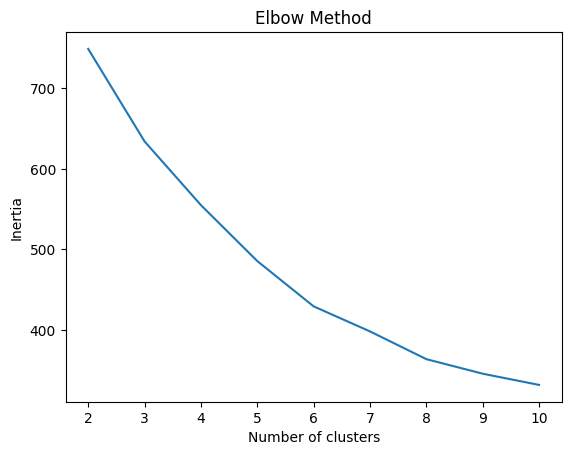

In [99]:

inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)
print(inertia)

plt.plot(range(2, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Fit the K-means clustering Model

In [100]:
optimal_k = 6
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(features_scaled)
final_data['Cluster'] = kmeans.labels_

In [101]:
db_index = davies_bouldin_score(features_scaled, final_data['Cluster'])
print(f"DB Index: {db_index}")

DB Index: 1.297368901766612


In [102]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(features_scaled, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.22972571453494572


In [103]:
inertia = kmeans.inertia_
print(f"Inertia: {inertia}")

Inertia: 429.2139306162406


In [88]:
# Step 7: Visualize clusters using PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(features_scaled)

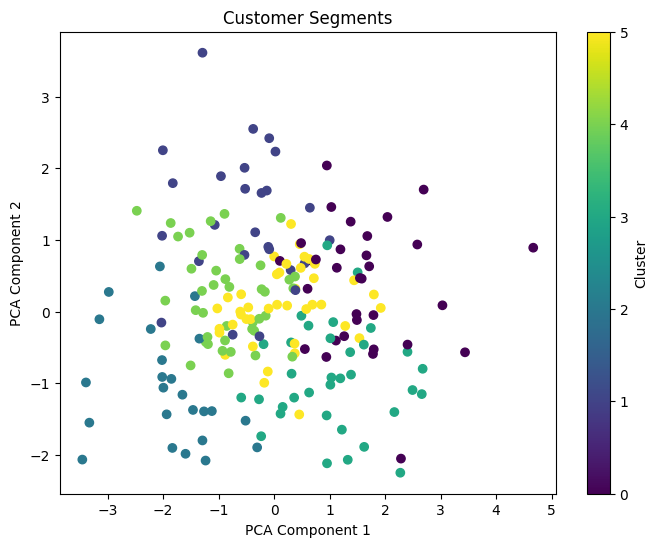

In [89]:
# Plot the clusters
plt.figure(figsize=(8,6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=final_data['Cluster'], cmap='viridis')
plt.title('Customer Segments')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()